In [58]:
import itertools
import warnings 

import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn.feature_selection import RFECV
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

from helpers import model_report_from

In [59]:
# sometimes optimization fails to converge during grid search and i dont care
warnings.filterwarnings('ignore')

In [60]:
ft_train = np.load("./processed_data/features_train.npy")
ft_test = np.load("./processed_data/features_test.npy")
lbl_train = np.load("./processed_data/labels_train.npy")
lbl_test = np.load("./processed_data/labels_test.npy")

In [61]:
features = np.load("./processed_data/features.npy")
labels = np.load("./processed_data/labels.npy")

In [62]:
feature_names = np.load("./processed_data/feature_names.npy")

# Linear Regression 

In [63]:
# goal here is to get p-values as an early estimate of feature importance 
sm.add_constant(ft_train)
est = sm.OLS(lbl_train, ft_train)

# fit with statsmodels package instead of sklearn 
result = est.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     22.96
Date:                Thu, 27 May 2021   Prob (F-statistic):           6.45e-69
Time:                        16:53:47   Log-Likelihood:                 666.60
No. Observations:                4088   AIC:                            -1297.
Df Residuals:                    4070   BIC:                            -1184.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.453e+11   5.15e+11      0.477      0.634   -7.64e+11    1.25e+12
x2          2.453e+11   5.15e+11      0.477      0.634   -7.64e+11    1.25e+12
x3         -1.531e+10   1.99e+11     -0.077      0.939   -4.05e+11    3.75e+11
x4         -1.531e+10   1.99e+11     -0.077      0.939   -4.05e+11    3.75e+11
x5         -1.531e+10   1.99e+11     -0.077      0.939   -4.05e+11    3.75e+11
x6         -1.531e+10   1.99e+11     -0.077      0.939   -4.05e+11    3.75e+11
x7         -1.531e+10   1.99e+11     -0.077      0.939   -4.05e+11    3.75e+11
x8         -4.422e+10   3.11e+11     -0.142      0.887   -6.54e+11    5.66e+11
x9         -4.422e+10   3.11e+11     -0.142      0.887   -6.54e+11    5.66e+11
x10        -1.857e+11   3.57e+11     -0.520      0.603   -8.86e+11    5.14e+11
x11        -1.857e+11   3.57e+11     -0.520      0.603   -8.86e+11    5.14e+11
x12        -1.857e+11   3.57e+11     -0.520      0.603   -8.86e+11    5.14e+11
x13        -1.857e+11   3.57e+11     -0.520      0.603   -8.86e+11    5.14e+11
x14            0.0038      0.003      1.163      0.245      -0.003       0.010
x15            0.0720      0.005     13.168      0.000       0.061       0.083
x16            0.0137      0.003      4.025      0.000       0.007       0.020
x17            0.0118      0.003      3.470      0.001       0.005       0.019
x18            0.0121      0.003      3.536      0.000       0.005       0.019
x19           -0.0028      0.005     -0.577      0.564      -0.012       0.007
x20           -0.0030      0.004     -0.715      0.475      -0.011       0.005
==============================================================================
Omnibus:                     3040.239   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37770.638
Skew:                           3.634   Prob(JB):                         0.00
Kurtosis:                      15.997   Cond. No.                     4.51e+14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.6e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [64]:
# removes all features that are not about smoking pretty much
# ft_train = ft_train[:,14:]
# ft_test = ft_test[:,14:]
# features = features[:,14:]

# Logistic Regression

## Hyperparameter tuning

In [65]:
param = {
    'C' : [0.001,0.003,0.005,0.01,0.03,0.05,0.1,0.3,0.5,1,2,3,3,4,5],
}
clf = GridSearchCV(LogisticRegression(class_weight='balanced'), param, scoring='recall', refit=True, cv=10)

In [66]:
clf.fit(ft_train, lbl_train)
clf.best_params_

{'C': 0.003}

## Training the model

In [67]:
lr = LogisticRegression(class_weight='balanced', C=clf.best_params_['C'])

In [68]:
lr.fit(ft_train, lbl_train)

LogisticRegression(C=0.003, class_weight='balanced')

## Results from the model

accuracy = 0.7211350293542074
precision = 0.13395638629283488
recall = 0.86
f1 = 0.23180592991913745
ROC AUC score = 0.7869958847736626


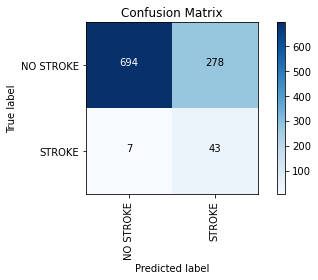

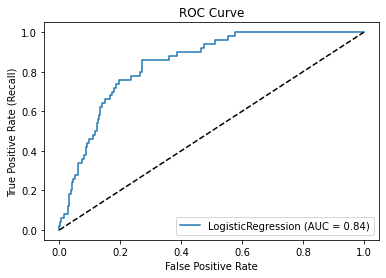

In [69]:
model_report_from(lr, ft_test, lbl_test, [])

## Feature importance

In [70]:
# using recursive feature elimination to determine importance of features
selector = RFECV(lr, step=1, cv=5).fit(ft_train, lbl_train)
selector.ranking_

array([ 1,  2,  5, 14,  4,  9,  7, 11, 13, 12,  1,  1, 10,  3,  1,  1,  1,
        1,  8,  6])

In [71]:
# this one seems to make the most sense
[feature for i, feature in enumerate(feature_names) if selector.ranking_[i] == 1]

['gender',
 'Private',
 'Self-employed',
 'Urban',
 'Unknown',
 'formerly smoked',
 'never smoked']

In [72]:
# trying to train model on reduced information
ft_train_fi = [[ft for i, ft in enumerate(row) if selector.ranking_[i] == 1] for row in ft_train]
ft_test_fi = [[ft for i, ft in enumerate(row) if selector.ranking_[i] == 1] for row in ft_test]

accuracy = 0.7191780821917808
precision = 0.12852664576802508
recall = 0.82
f1 = 0.22222222222222224
ROC AUC score = 0.7669958847736624


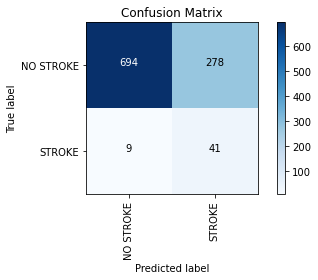

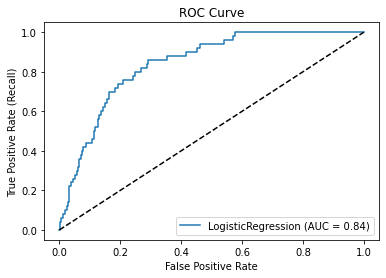

In [73]:
# makes model a bit worse
lr_fi = LogisticRegression(class_weight='balanced', C=clf.best_params_['C'])
lr_fi.fit(ft_train_fi, lbl_train)
model_report_from(lr_fi, ft_test_fi, lbl_test, [])


## Taking a look at those that went wrong

In [74]:
df = pd.read_csv('./raw_data/dataset-stroke.csv').drop(columns=['id'])

In [75]:
df['pred_stroke'] = lr.predict(features)
df['prob_pos'] = lr.predict_proba(features)[:,1]

In [76]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,pred_stroke,prob_pos
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,0.804221
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,1,0.580408
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1,0.776671
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0,0.474517
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,1,0.812541


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>,
        <AxesSubplot:title={'center':'heart_disease'}>],
       [<AxesSubplot:title={'center':'avg_glucose_level'}>,
        <AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'stroke'}>],
       [<AxesSubplot:title={'center':'pred_stroke'}>,
        <AxesSubplot:title={'center':'prob_pos'}>, <AxesSubplot:>]],
      dtype=object)

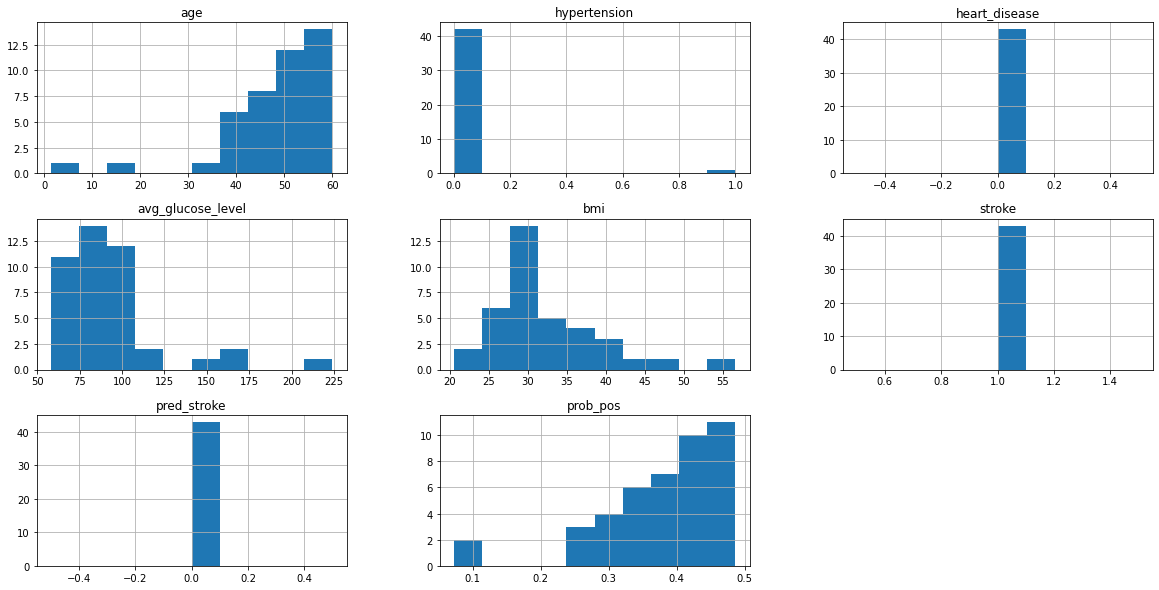

In [77]:
# False negatives (most dire)
df[df.pred_stroke == 0][df.stroke == 1].hist(figsize=(20, 10))

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>,
        <AxesSubplot:title={'center':'heart_disease'}>],
       [<AxesSubplot:title={'center':'avg_glucose_level'}>,
        <AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'stroke'}>],
       [<AxesSubplot:title={'center':'pred_stroke'}>,
        <AxesSubplot:title={'center':'prob_pos'}>, <AxesSubplot:>]],
      dtype=object)

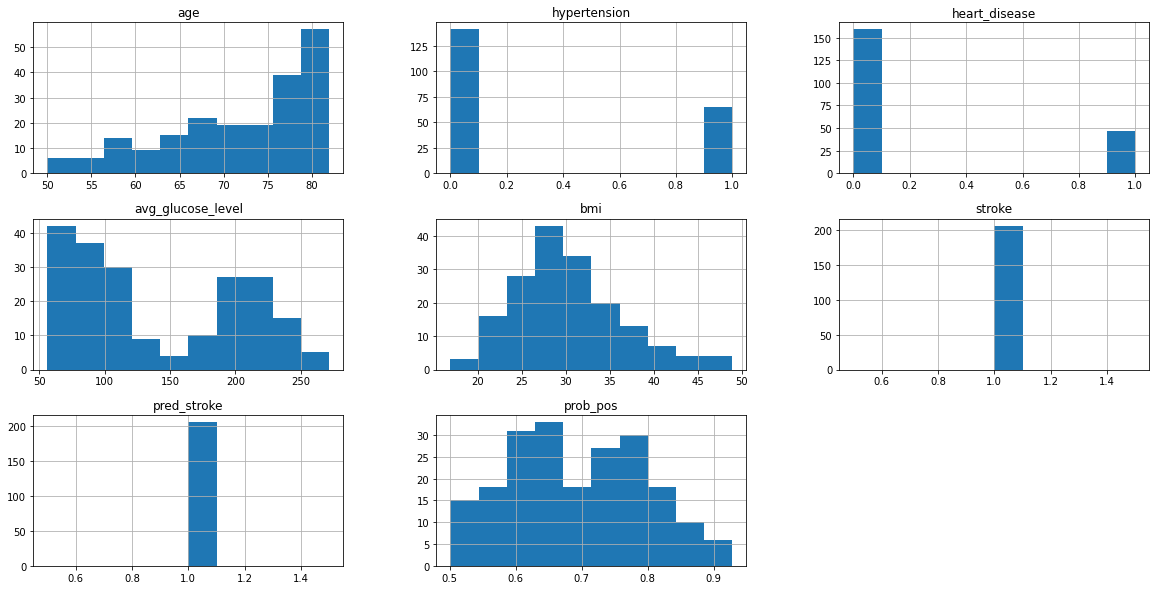

In [78]:
df[df.stroke==1][df.stroke == df.pred_stroke].hist(figsize=(20,10))

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>,
        <AxesSubplot:title={'center':'heart_disease'}>],
       [<AxesSubplot:title={'center':'avg_glucose_level'}>,
        <AxesSubplot:title={'center':'bmi'}>,
        <AxesSubplot:title={'center':'stroke'}>],
       [<AxesSubplot:title={'center':'pred_stroke'}>,
        <AxesSubplot:title={'center':'prob_pos'}>, <AxesSubplot:>]],
      dtype=object)

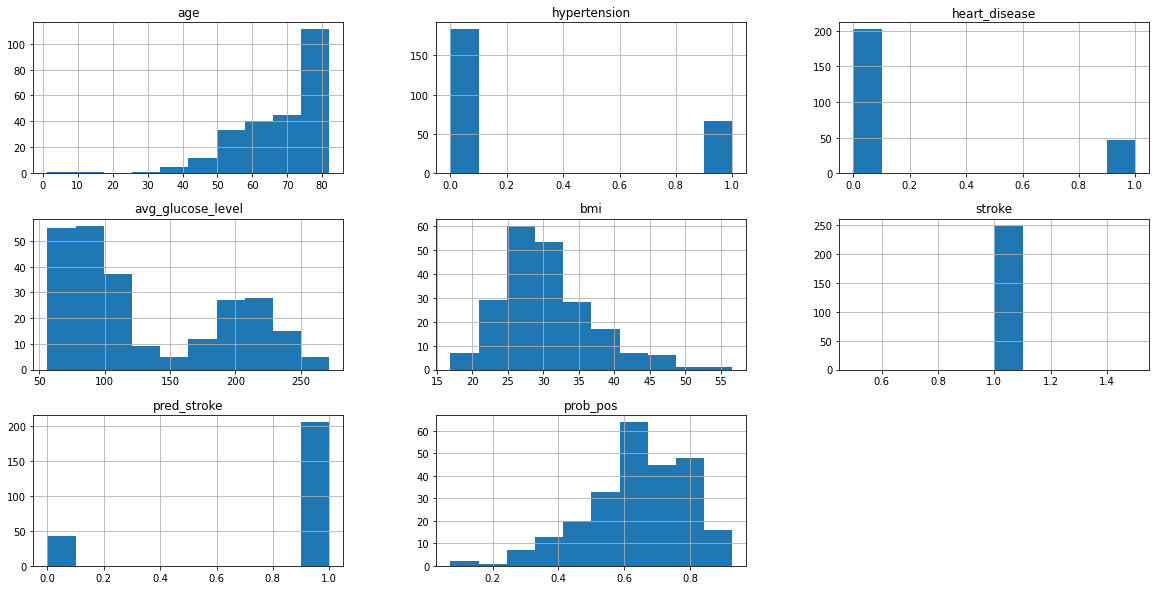

In [79]:
df[df.stroke == 1].hist(figsize=(20,10))

## Testing result of lowering probability threshold 

In [80]:
df['low_thresh_stroke'] = df.prob_pos.apply(lambda x: 1 if x > 0.35 else 0)

accuracy = 0.549119373776908
precision = 0.09339137316976652
recall = 0.9477911646586346
f1 = 0.17002881844380405
ROC AUC score = 0.7382444817327323


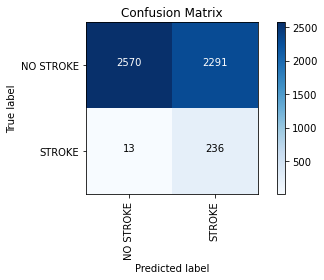

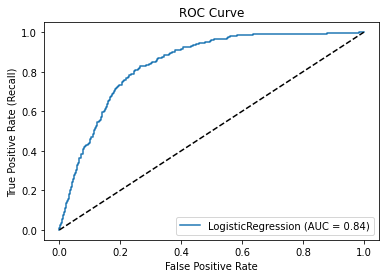

In [81]:
model_report_from(lr, features, labels, y_test_pred=df.low_thresh_stroke.to_numpy())

accuracy = 0.7379647749510763
precision = 0.13715046604527298
recall = 0.8273092369477911
f1 = 0.23529411764705882
ROC AUC score = 0.7803487143389439


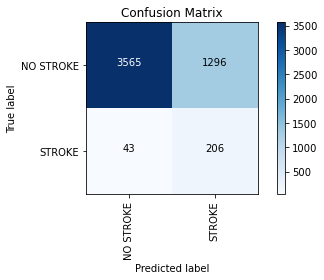

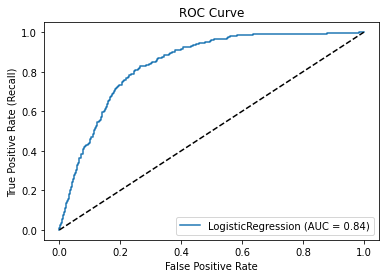

In [82]:
# vanilla (all data)
model_report_from(lr, features, labels, [])